<a href="https://colab.research.google.com/github/LW068/atlas-machine_learning/blob/main/pipeline/pandas/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
import os
import zipfile
from sklearn.preprocessing import MinMaxScaler

# Loading & Preprocessing data

In [5]:
# loading data
bitstamp_raw_data = pd.read_csv(os.path.join('/content/sample_data/bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv.zip'))
coinbase_raw_data = pd.read_csv(os.path.join('/content/sample_data/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv.zip'))

# checking if loaded correctly
print("Bitstamp Data Loaded:")
print(bitstamp_raw_data.head())
print("Shape:", bitstamp_raw_data.shape)
print("\nCoinbase Data Loaded:")
print(coinbase_raw_data.head())
print("Shape:", coinbase_raw_data.shape)

# dropping NaN values
bitstamp_raw_data = bitstamp_raw_data.dropna()
coinbase_raw_data = coinbase_raw_data.dropna()
# checking if dropped correctly
print("NaN Values Dropped Correctly.")

def preprocess_data(df, filename):
   # drop rows with NaN values
   df = df.dropna(subset=['Close'])

   # select the column to predict
   data_to_use = df['Close'].values

   # reshape the data
   data_to_use = np.reshape(data_to_use, (-1, 1))

   # normalize the data
   scaler = MinMaxScaler()
   data_to_use = scaler.fit_transform(data_to_use)

   # save preprocessed data to a file
   np.save(filename, data_to_use)

# preprocess data
preprocess_data(bitstamp_raw_data, 'bitstamp_preprocessed_data_v2.npy')
preprocess_data(coinbase_raw_data, 'coinbase_preprocessed_data_v2.npy')

# Load preprocessed data
bitstamp_preprocessed_data_v2 = np.load('bitstamp_preprocessed_data_v2.npy')
coinbase_preprocessed_data_v2 = np.load('coinbase_preprocessed_data_v2.npy')

# Check for NaN values in the preprocessed data
print("Checking for NaN values in preprocessed data...")
print("Bitstamp preprocessed data has NaN values:", np.isnan(bitstamp_preprocessed_data_v2).any())
print("Coinbase preprocessed data has NaN values:", np.isnan(coinbase_preprocessed_data_v2).any())

# Print preprocessed data
print(bitstamp_preprocessed_data_v2)
print(coinbase_preprocessed_data_v2)

Bitstamp Data Loaded:
    Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   
3  1325318100   NaN   NaN   NaN    NaN           NaN                NaN   
4  1325318160   NaN   NaN   NaN    NaN           NaN                NaN   

   Weighted_Price  
0            4.39  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
Shape: (4363457, 8)

Coinbase Data Loaded:
    Timestamp   Open   High    Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1417411980  300.0  300.0  300.0  300.0          0.01                3.0   
1  1417412040    NaN    NaN    NaN    NaN           NaN                NaN   
2  1417412100    NaN    NaN    NaN    NaN           NaN                NaN   
3  1417412160    NaN    NaN    NaN    NaN           

# Task 0. From Numpy | 0-from_numpy.py

In [6]:
def from_numpy(array):
    """Creates a pd.DataFrame from a np.ndarray with columns labeled in alphabetical order and capitalized"""
    import pandas as pd

    # Generating column labels based on the shape of the array
    # there are 26 letters in the English alphabet, so we limit it to that
    column_labels = [chr(i) for i in range(65, 65 + array.shape[1])]

    # Creating the DataFrame
    df = pd.DataFrame(array, columns=column_labels)

    return df

### Testing Task 0. | 0-main.py

In [7]:
np.random.seed(0)
A = np.random.randn(5, 8)
print(from_numpy(A))
B = np.random.randn(9, 3)
print(from_numpy(B))

          A         B         C         D         E         F         G  \
0  1.764052  0.400157  0.978738  2.240893  1.867558 -0.977278  0.950088   
1 -0.103219  0.410599  0.144044  1.454274  0.761038  0.121675  0.443863   
2  1.494079 -0.205158  0.313068 -0.854096 -2.552990  0.653619  0.864436   
3  2.269755 -1.454366  0.045759 -0.187184  1.532779  1.469359  0.154947   
4 -0.887786 -1.980796 -0.347912  0.156349  1.230291  1.202380 -0.387327   

          H  
0 -0.151357  
1  0.333674  
2 -0.742165  
3  0.378163  
4 -0.302303  
          A         B         C
0 -1.048553 -1.420018 -1.706270
1  1.950775 -0.509652 -0.438074
2 -1.252795  0.777490 -1.613898
3 -0.212740 -0.895467  0.386902
4 -0.510805 -1.180632 -0.028182
5  0.428332  0.066517  0.302472
6 -0.634322 -0.362741 -0.672460
7 -0.359553 -0.813146 -1.726283
8  0.177426 -0.401781 -1.630198


# Task 1. From Dictionary | 1-from_dictionary.py

In [8]:
# creates the dictionary with specified values
data_dict = {
    "First": [0.0, 0.5, 1.0, 1.5],
    "Second": ["one", "two", "three", "four"]
}

# Create the DataFrame from the dictionary
df = pd.DataFrame(data_dict)

# Set the row labels aka index
df.index = ["A", "B", "C", "D"]

### Testing Task 1. | 1-main.py

In [9]:
print(df)

   First Second
A    0.0    one
B    0.5    two
C    1.0  three
D    1.5   four


# Task 2. From File | 2-from_file.py

In [10]:
def from_file(filename, delimiter):
    """Loads data from a file into a pd.DataFrame"""
    import pandas as pd

    # laoding the data into a DataFrame
    df = pd.read_csv(filename, delimiter=delimiter)

    return df

### Testing Task 2. | 2-main.py

In [13]:
coinbase_raw_data = from_file('/content/sample_data/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv.zip', ',')
bitstamp_raw_data = from_file('/content/sample_data/bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv.zip', ',')
print("Coinbase Data Loaded:")
print(coinbase_raw_data.head())
print("\nBitstamp Data Loaded:")
print(bitstamp_raw_data.head())

Coinbase Data Loaded:
    Timestamp   Open   High    Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1417411980  300.0  300.0  300.0  300.0          0.01                3.0   
1  1417412040    NaN    NaN    NaN    NaN           NaN                NaN   
2  1417412100    NaN    NaN    NaN    NaN           NaN                NaN   
3  1417412160    NaN    NaN    NaN    NaN           NaN                NaN   
4  1417412220    NaN    NaN    NaN    NaN           NaN                NaN   

   Weighted_Price  
0           300.0  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

Bitstamp Data Loaded:
    Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   
3  1325318100   NaN   NaN   NaN    NaN           NaN              

# Task 3. Rename | 3-rename.py

In [28]:
print(coinbase_raw_data.columns)

Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')


In [22]:
filtered_df = coinbase_raw_data[['Datetime', 'Close']]

# renaming the column 'Timestamp' to 'Datetime'
coinbase_raw_data.rename(columns={'Timestamp': 'Datetime'}, inplace=True)

# converting the 'Datetime' column from Unix timestamp to datetime format
coinbase_raw_data['Datetime'] = pd.to_datetime(coinbase_raw_data['Datetime'], unit='s')

# displaying only the 'Datetime' and 'Close' columns
filtered_df = coinbase_raw_data[['Datetime', 'Close']]
print(filtered_df.tail())

                   Datetime    Close
2099755 2019-01-07 22:02:00  4006.01
2099756 2019-01-07 22:03:00  4006.01
2099757 2019-01-07 22:04:00  4006.01
2099758 2019-01-07 22:05:00  4005.50
2099759 2019-01-07 22:06:00  4005.99


# Task 4. To Numpy | 4-array.py

In [29]:
# selectinmg the last 10 rows of the 'High' and 'Close' columns
selected_data = coinbase_raw_data[['High', 'Close']].tail(10)

# converting the selected portion into a numpy.ndarray
A = selected_data.values

print(A)

[[4009.54 4007.01]
 [4007.01 4003.49]
 [4007.29 4006.57]
 [4006.57 4006.56]
 [4006.57 4006.01]
 [4006.57 4006.01]
 [4006.57 4006.01]
 [4006.01 4006.01]
 [4006.01 4005.5 ]
 [4006.01 4005.99]]


# Task 5. Slice | 5-slice.py

In [30]:
# selecting the specified columns
selected_columns = coinbase_raw_data[['High', 'Low', 'Close', 'Volume_(BTC)']]

# slicing to take every 60th row
sliced_df = selected_columns.iloc[::60, :]

print(sliced_df.tail())

            High      Low    Close  Volume_(BTC)
2099460  4020.08  4020.07  4020.08      4.704989
2099520  4020.94  4020.93  4020.94      2.111411
2099580  4020.00  4019.01  4020.00      4.637035
2099640  4017.00  4016.99  4017.00      2.362372
2099700  4014.78  4013.50  4014.72      1.291557


# Task 6. Flip it and Switch it | 6-flip_switch.py

In [33]:
# transposing the DataFrame
df_transposed = sliced_df.T

# sort chronologically
df_sorted = df_transposed.sort_index(axis=1, ascending=False)

print(df_transposed.tail(8))

              0        60       120      180      240      300      360      \
High           300.00      NaN      NaN      NaN      NaN      NaN      NaN   
Low            300.00      NaN      NaN      NaN      NaN      NaN      NaN   
Close          300.00      NaN      NaN      NaN      NaN      NaN      NaN   
Volume_(BTC)     0.01      NaN      NaN      NaN      NaN      NaN      NaN   

              420      480      540      ...      2099160      2099220  \
High              NaN      NaN      NaN  ...  4019.510000  4010.500000   
Low               NaN      NaN      NaN  ...  4019.500000  4010.490000   
Close             NaN      NaN      NaN  ...  4019.510000  4010.490000   
Volume_(BTC)      NaN      NaN      NaN  ...     0.229088     2.148034   

                  2099280      2099340      2099400      2099460      2099520  \
High          4024.000000  4030.000000  4011.000000  4020.080000  4020.940000   
Low           4018.510000  4028.880000  4010.990000  4020.070000  4020.

# Task 7. Sort | 7-high.py

In [34]:
# sorting
sorted_df = sliced_df.sort_values(by='High', ascending=False)

print(sorted_df.head())

             High       Low     Close  Volume_(BTC)
1543320  19867.00  19850.00  19867.00      8.919281
1543440  19790.52  19790.51  19790.51      3.168317
1543260  19772.60  19750.00  19772.60     21.586600
1543080  19746.00  19745.99  19746.00      5.902266
1543200  19736.80  19731.06  19736.01      2.628802


# Task 8. Prune | 8-prune.py

In [35]:
# pruning
pruned_df = sliced_df.dropna(subset=['Close'])

print(pruned_df.head())

        High     Low   Close  Volume_(BTC)
0     300.00  300.00  300.00          0.01
4140  337.90  279.37  337.90          0.03
4200  311.56  275.67  275.67          0.03
4260  293.67  290.78  293.67          0.02
4320  299.61  294.02  299.61          0.03


# Task 9. Fill | 9-fill.py

In [40]:
print(sliced_df.columns)

Index(['High', 'Low', 'Close', 'Volume_(BTC)'], dtype='object')


In [44]:
# filling missing values in 'Close' with the previous row's value
sliced_df['Close'] = sliced_df['Close'].fillna(method='ffill')

# filling missing values in 'High', 'Low', 'Open' with the same row's 'Close' value
sliced_df['High'] = sliced_df['High'].fillna(sliced_df['Close'])
sliced_df['Low'] = sliced_df['Low'].fillna(sliced_df['Close'])

# filling missing values in 'Volume_(BTC)' and 'Volume_(Currency)' with 0
sliced_df['Volume_(BTC)'] = sliced_df['Volume_(BTC)'].fillna(0)

print(sliced_df.head())
print(sliced_df.tail())

      High    Low  Close  Volume_(BTC)
0    300.0  300.0  300.0          0.01
60   300.0  300.0  300.0          0.00
120  300.0  300.0  300.0          0.00
180  300.0  300.0  300.0          0.00
240  300.0  300.0  300.0          0.00
            High      Low    Close  Volume_(BTC)
2099640  4017.00  4016.99  4017.00      2.362372
2099700  4014.78  4013.50  4014.72      1.291557
Close    4014.72  4014.72  4014.72      0.000000
High     4014.72  4014.72  4014.72      0.000000
Low      4014.72  4014.72  4014.72      0.000000


<ipython-input-44-af8eaa93782f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_df['Close'] = sliced_df['Close'].fillna(method='ffill')
<ipython-input-44-af8eaa93782f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_df['High'] = sliced_df['High'].fillna(sliced_df['Close'])
<ipython-input-44-af8eaa93782f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

# Task 10. Indexing | 10-index.py

In [45]:
print(coinbase_raw_data.columns)

Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')


In [46]:
# setting 'Datetime' as the index of the DataFrame
coinbase_raw_data.set_index('Datetime', inplace=True)

# so now 'Datetime' is the index
print(coinbase_raw_data.tail())

                        Open     High      Low    Close  Volume_(BTC)  \
Datetime                                                                
2019-01-07 22:02:00  4006.01  4006.57  4006.00  4006.01      3.382954   
2019-01-07 22:03:00  4006.01  4006.57  4006.00  4006.01      0.902164   
2019-01-07 22:04:00  4006.01  4006.01  4006.00  4006.01      1.192123   
2019-01-07 22:05:00  4006.01  4006.01  4005.50  4005.50      2.699700   
2019-01-07 22:06:00  4005.51  4006.01  4005.51  4005.99      1.752778   

                     Volume_(Currency)  Weighted_Price  
Datetime                                                
2019-01-07 22:02:00       13553.433078     4006.390309  
2019-01-07 22:03:00        3614.083168     4006.017232  
2019-01-07 22:04:00        4775.647308     4006.003635  
2019-01-07 22:05:00       10814.241898     4005.719991  
2019-01-07 22:06:00        7021.183546     4005.745614  


# Task 11. Concat | 11-concat.py

In [50]:
print(coinbase_raw_data.columns)
print(bitstamp_raw_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price'],
      dtype='object')
Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')


In [51]:
# converting 'Timestamp' to datetime format and set as index for bitstamp_raw_data
bitstamp_raw_data['Datetime'] = pd.to_datetime(bitstamp_raw_data['Timestamp'], unit='s')
bitstamp_raw_data.set_index('Datetime', inplace=True)
bitstamp_raw_data.drop(columns=['Timestamp'], inplace=True)

# filster bitstamp_raw_data
bitstamp_filtered = bitstamp_raw_data[bitstamp_raw_data.index <= pd.to_datetime(1417411920, unit='s')]

# concat the filtered bitstamp data with coinbase data
concat_df = pd.concat([bitstamp_filtered, coinbase_raw_data], keys=['bitstamp', 'coinbase'])

print(concat_df)

                                 Open     High      Low    Close  \
         Datetime                                                  
bitstamp 2011-12-31 07:52:00     4.39     4.39     4.39     4.39   
         2011-12-31 07:53:00      NaN      NaN      NaN      NaN   
         2011-12-31 07:54:00      NaN      NaN      NaN      NaN   
         2011-12-31 07:55:00      NaN      NaN      NaN      NaN   
         2011-12-31 07:56:00      NaN      NaN      NaN      NaN   
...                               ...      ...      ...      ...   
coinbase 2019-01-07 22:02:00  4006.01  4006.57  4006.00  4006.01   
         2019-01-07 22:03:00  4006.01  4006.57  4006.00  4006.01   
         2019-01-07 22:04:00  4006.01  4006.01  4006.00  4006.01   
         2019-01-07 22:05:00  4006.01  4006.01  4005.50  4005.50   
         2019-01-07 22:06:00  4005.51  4006.01  4005.51  4005.99   

                              Volume_(BTC)  Volume_(Currency)  Weighted_Price  
         Datetime                  

# Task 12. Hierarchy | 12-hierarchy.py

In [52]:
# converting the specified timestamps to datetime objects for filtering
start_datetime = pd.to_datetime(1417411980, unit='s')
end_datetime = pd.to_datetime(1417417980, unit='s')

# filtering both DataFrames for the specified datetime range
bitstamp_filtered = bitstamp_raw_data.loc[start_datetime:end_datetime]
coinbase_filtered = coinbase_raw_data.loc[start_datetime:end_datetime]

# concat the filtered DataFrames and adding keys for each source
concatenated_df = pd.concat([bitstamp_filtered, coinbase_filtered], keys=['bitstamp', 'coinbase'])

# ensure that it's chronologically ordered
concatenated_df = concatenated_df.sort_index()

print(concatenated_df)

                                Open   High     Low  Close  Volume_(BTC)  \
         Datetime                                                          
bitstamp 2014-12-01 05:33:00  379.99  380.0  379.99  380.0      3.901265   
         2014-12-01 05:34:00  380.00  380.0  380.00  380.0     35.249895   
         2014-12-01 05:35:00  380.00  380.0  380.00  380.0      3.712000   
         2014-12-01 05:36:00  379.93  380.0  379.93  380.0     13.451000   
         2014-12-01 05:37:00  380.00  380.0  380.00  380.0      1.693000   
...                              ...    ...     ...    ...           ...   
coinbase 2014-12-01 07:09:00     NaN    NaN     NaN    NaN           NaN   
         2014-12-01 07:10:00     NaN    NaN     NaN    NaN           NaN   
         2014-12-01 07:11:00     NaN    NaN     NaN    NaN           NaN   
         2014-12-01 07:12:00     NaN    NaN     NaN    NaN           NaN   
         2014-12-01 07:13:00     NaN    NaN     NaN    NaN           NaN   

           

# Task 13. Analyze | 13-analyze.py

In [54]:
stats = concatenated_df.describe()

print(stats)

             Open        High         Low       Close  Volume_(BTC)  \
count   99.000000   99.000000   99.000000   99.000000     99.000000   
mean   378.172424  378.284545  377.937172  378.208687      5.592834   
std     11.378471   11.392927   11.350562   11.384584      8.643884   
min    300.000000  300.000000  300.000000  300.000000      0.010000   
25%    379.930000  379.995000  379.150000  379.980000      1.420500   
50%    380.140000  380.180000  379.990000  380.150000      2.218718   
75%    380.190000  380.190000  380.180000  380.190000      5.559215   
max    380.700000  380.700000  380.700000  380.700000     50.262040   

       Volume_(Currency)  Weighted_Price  
count          99.000000       99.000000  
mean         2124.588520      378.106949  
std          3284.300147       11.368875  
min             3.000000      300.000000  
25%           539.021021      379.654436  
50%           842.353696      380.028256  
75%          2113.122548      380.188634  
max         1910

# Task 14. Visualize | 14-visualize.py

In [64]:
print("Bitstamp Data Head:")
print(bitstamp_raw_data.head())

print("\nBitstamp Data Tail:")
print(bitstamp_raw_data.tail())

print("\nCoinbase Data Head:")
print(coinbase_raw_data.head())

print("\nCoinbase Data Tail:")
print(coinbase_raw_data.tail())

print("\nConcatenated Data Head:")
print(concatenated_df.head())

print("\nConcatenated Data Tail:")
print(concatenated_df.tail())

Bitstamp Data Head:
                     Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
Datetime                                                                        
2011-12-31 07:52:00  4.39  4.39  4.39   4.39      0.455581                2.0   
2011-12-31 07:53:00   NaN   NaN   NaN    NaN           NaN                NaN   
2011-12-31 07:54:00   NaN   NaN   NaN    NaN           NaN                NaN   
2011-12-31 07:55:00   NaN   NaN   NaN    NaN           NaN                NaN   
2011-12-31 07:56:00   NaN   NaN   NaN    NaN           NaN                NaN   

                     Weighted_Price  
Datetime                             
2011-12-31 07:52:00            4.39  
2011-12-31 07:53:00             NaN  
2011-12-31 07:54:00             NaN  
2011-12-31 07:55:00             NaN  
2011-12-31 07:56:00             NaN  

Bitstamp Data Tail:
                        Open     High      Low    Close  Volume_(BTC)  \
Datetime                                            

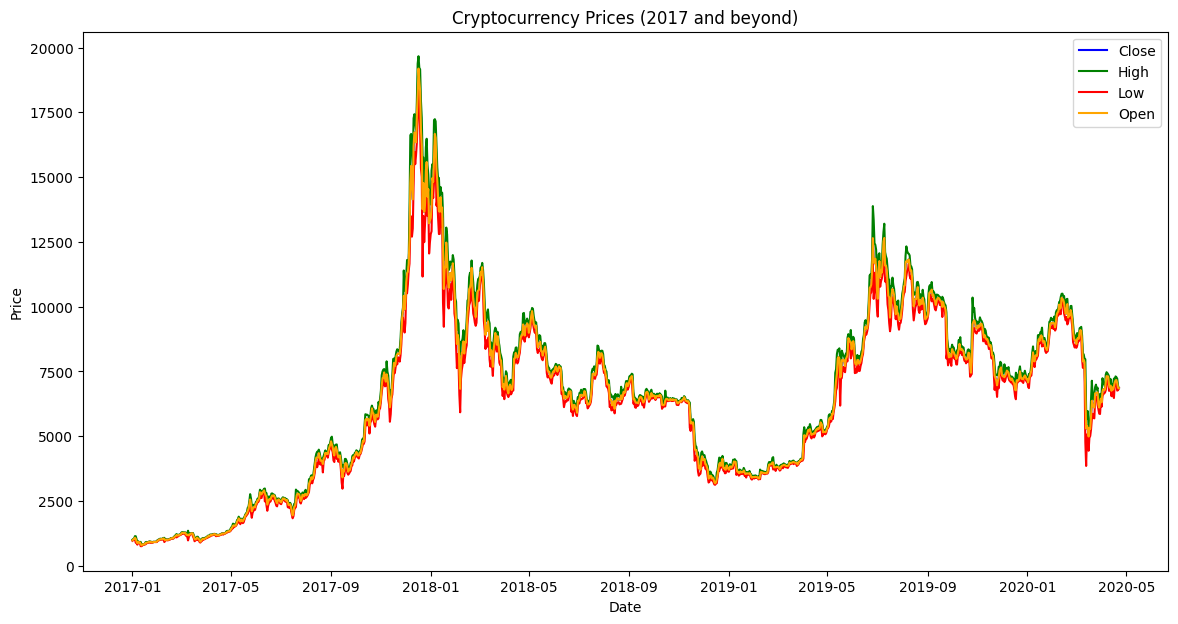

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

# removing 'Weighted_Price'
bitstamp_df = bitstamp_raw_data.drop(columns=['Weighted_Price'], errors='ignore')

# making sure theres no missing values
bitstamp_df['Close'] = bitstamp_df['Close'].fillna(method='ffill')
bitstamp_df[['High', 'Low', 'Open']] = bitstamp_df[['High', 'Low', 'Open']].fillna(bitstamp_df['Close'], axis=0)
bitstamp_df[['Volume_(BTC)', 'Volume_(Currency)']] = bitstamp_df[['Volume_(BTC)', 'Volume_(Currency)']].fillna(0)

# aggregate and plot data from 2017 onwards
bitstamp_df_agg = bitstamp_df['2017':].resample('D').agg({
    'High': 'max',
    'Low': 'min',
    'Open': 'mean',
    'Close': 'mean',
    'Volume_(BTC)': 'sum',
    'Volume_(Currency)': 'sum'
})

# PLOTTING
plt.figure(figsize=(14, 7))
plt.plot(bitstamp_df_agg.index, bitstamp_df_agg['Close'], label='Close', color='blue')
plt.plot(bitstamp_df_agg.index, bitstamp_df_agg['High'], label='High', color='green')
plt.plot(bitstamp_df_agg.index, bitstamp_df_agg['Low'], label='Low', color='red')
plt.plot(bitstamp_df_agg.index, bitstamp_df_agg['Open'], label='Open', color='orange')
plt.title('Cryptocurrency Prices (2017 and beyond)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()